I ran the following notebook in a docker container with the following commands:

```
docker pull bethgelab/jupyter-torch:ubuntu-14.04
docker run -it -v `pwd`:/space/ -p 8888:8888 --name keras -w /space/ --rm bethgelab/jupyter-torch:ubuntu-14.04 jupyter notebook --ip=0.0.0.0
```

The following code is adapted from https://github.com/fastforwardlabs/keras-hello-world/blob/master/kerashelloworld.ipynb

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegressionCV

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

/usr/local/lib/python2.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
Using Theano backend.


In [2]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1314: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


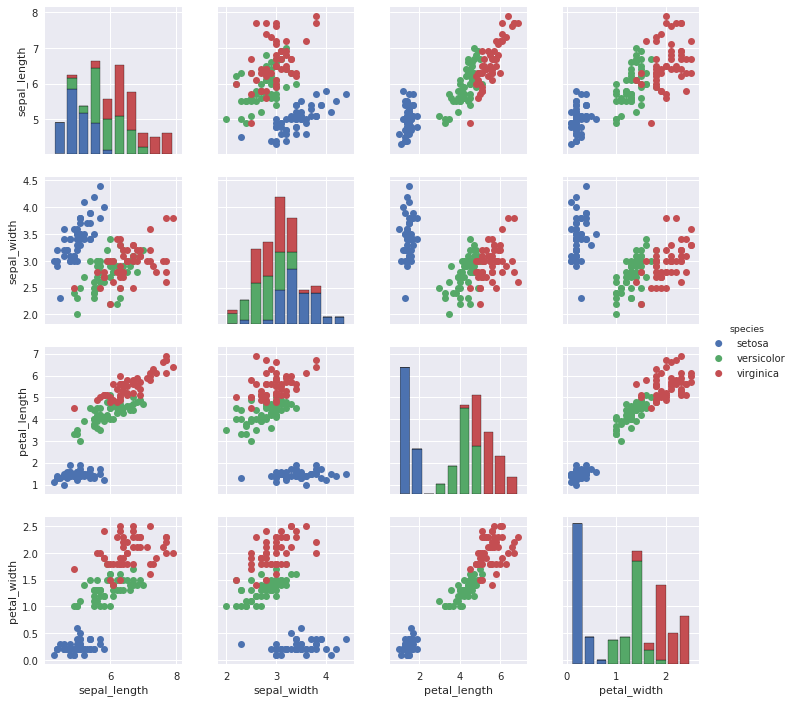

In [3]:
sns.pairplot(iris, hue='species');

In [4]:
X = iris.values[:, :4]
y = iris.values[:, 4]

In [5]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, random_state=0)

In [6]:
lr = LogisticRegressionCV()
lr.fit(train_X, train_y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [7]:
print("Accuracy = {:.2f}".format(lr.score(test_X, test_y)))

Accuracy = 0.83


In [8]:
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

train_y_ohe = one_hot_encode_object_array(train_y)
test_y_ohe = one_hot_encode_object_array(test_y)

In [9]:
from keras.layers.core import Dropout

In [10]:
model = Sequential()

In [11]:
model.add(Dense(16, input_shape=(4,)))
model.add(Activation('sigmoid'))

In [12]:
model.add(Dense(3))
model.add(Dropout(0.01))
model.add(Activation('softmax'))

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
model.fit(train_X, train_y_ohe, nb_epoch=1000, batch_size=1, verbose=0)
loss, accuracy = model.evaluate(test_X, test_y_ohe, verbose=0)
print("Accuracy = {:.2f}".format(accuracy))

Accuracy = 0.97
